<center> <h1>QuACK workshop: Linear Algebra</h1> </center>

## Thursday, October 13, 2016

## Outline
   * Why linear algebra?
   * Basics of linear algebra: worksheet
   * Linear regression example
   

### Let's start with some basics (see handout):
* Vectors
* Matrices
* Dot products
* Matrix dimensions
* Matrix operations
* Transpose of a matrix
* Eigenvectors and eigenvalues

<u>$1.$	What is a vector? An example or a drawing will suffice.

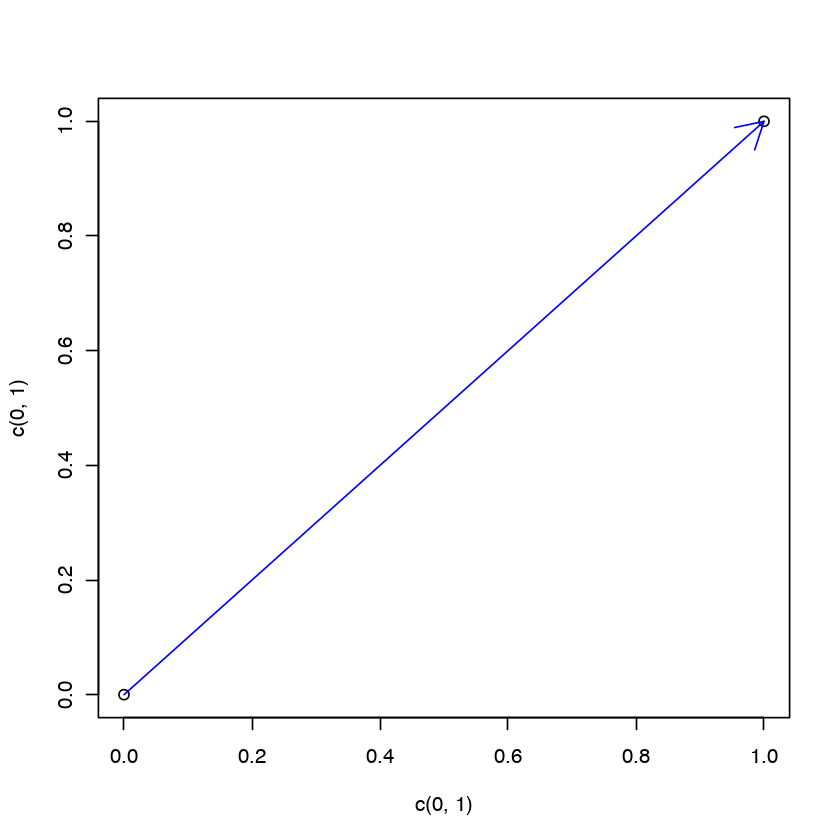

In [1]:
plot(c(0,1),c(0,1))
arrows(0,0,1,1,col="blue")

<u>$2.$	Please give an example of a matrix. What are they used for?</u>

$$\begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    x_{d1}       & x_{d2} & x_{d3} & \dots & x_{dn}
\end{bmatrix}$$

In [ ]:
M <- matrix(rnorm(4),2,2)
M

<u>$3.$ 	Let $v$ be the vector $(2,5,7)$. What is $3 ∙ v$ ?

In [ ]:
v  <-  c(2,5,7)
v
3*v

<u>$4.$ Let $w$ be the vector $(3,4,1)$. What is the dot product $v \cdot w$ ? Is it the same as $w \cdot v$?</u>

$$ 
v \cdot w = \sum_{i=1}^{n} v_i \cdot w_i 
$$

Where $v$ and $w$ are both $n \times 1$. 

In this case:
$$
\begin{align}
v \cdot w &= \sum_{i=1}^{3} v_i \cdot w_i \\
&= v_{1} \cdot w_{1} + v_{2} \cdot w_{2} + v_{3} \cdot w_{3} \\
&= 2 \cdot 3 + 5 \cdot 4 + 7 \cdot 1 \\
&= 6 + 20 + 7 \\
&= 33
\end{align}
$$

In [ ]:
w  <-  c(3,4,1)
w
v*w # careful, this does element-wise multiplication and returns a vector, which is not the same as a dot product!
sum(v*w) # but if you do element-wise multiplication and take the sum, this will return the dot product

In [ ]:
v %*% w
w %*% v

<u>$5.$	If you multiply a 2 x 3 matrix with a 3 x 7 matrix, what is the size of the matrix you will end up with? What about if you multiply a 4 x 4 with a 3 x 4? 

$$
\begin{bmatrix} a_{11} & a_{12} & a_{13}\\ a_{21} & a_{22} & a_{23}\end{bmatrix} \cdot \begin{bmatrix} b_{11} & b_{12} & b_{13} & b_{14} & b_{15} & b_{16} & b_{17} \\ b_{21} & b_{22} & b_{23} & b_{24} & b_{25} & b_{26} & b_{27}\\ b_{31} & b_{32} & b_{33} & b_{34} & b_{35} & b_{36} & b_{37} \\  \end{bmatrix} =  ?
$$

$$
\begin{bmatrix} x_{11} & x_{12} & x_{13} & x_{14}\\ x_{21} & x_{22} & x_{23} & x_{24} \\ x_{31} & x_{32} & x_{33} & x_{34} \\ x_{41} & x_{42} & x_{43} & x_{44}\end{bmatrix} \cdot \begin{bmatrix} y_{11} & y_{12} & y_{13} & y_{14}\\ y_{21} & y_{22} & y_{23} & y_{24}\\ y_{31} & y_{32} & y_{33} & y_{34} \end{bmatrix} =  ?
$$

In [ ]:
M1 <- matrix(rnorm(6),2,3) # generates 6 numbers from a normal distribution and arranges them in a 2x3 matrix
M2 <- matrix(rnorm(21),3,7) # generates 21 numbers and arranges them in a 3x7 matrix
dim(M1)
dim(M2)
dim(M1 %*% M2)

In [ ]:
M1 <- matrix(rnorm(16),4,4)  
M2 <- matrix(rnorm(12),3,4)  
dim(M1)
dim(M2)
dim(M1 %*% M2) # you should get an error!

In [ ]:
dim(M1 %*% t(M2)) #this will work - we'll talk about transposes a little later

This is all to demonstrate that the <b> inner dimensions </b> of the matrices you're multiplying need to line up. We'll talk about matrix multiplication next. Note that this means $A \cdot B$ does not necessarily equal $B \cdot A$.

<u>$6.$ Let $A$ and $B$ be matrices:  </u>
$$A = \begin{bmatrix}
    2 & 1 \\
    5 & 0 \\
\end{bmatrix}$$

$$B = \begin{bmatrix}
    1 & 1 \\
    4 & 2 \\
\end{bmatrix}$$
<u>Calculate $A + B$, $AB$, and $2A – B$.

In [ ]:
A = matrix(c(2,5,1,0),nrow=2,ncol=2)
B = matrix(c(1,1,4,2),nrow=2,ncol=2,byrow=T)
A
B

In [ ]:
dim(A)
dim(B)

$$
A + B = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} + \begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix} = \begin{bmatrix} a_{11} + b_{11} & a_{12} + b_{12} \\ a_{21} + b_{21} & a_{22} + b_{22} \end{bmatrix}
$$

In [ ]:
A+B

$$
A \cdot B = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \cdot \begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix} = \begin{bmatrix} a_{11} \cdot b_{11} + a_{12} \cdot b_{21} & a_{11} \cdot b_{12} + a_{12} \cdot b_{22} \\ a_{21} \cdot b_{11} + a_{22} \cdot b_{21} & a_{21} \cdot b_{12} + a_{22} \cdot b_{22} \end{bmatrix}
$$

Or, more generally, if $C = A \cdot B$:

$$ c_{ij} = \sum_k a_{ik} \cdot b_{kj} $$

Meaning the $ij^{th}$ element of $C$ is the <b>dot product</b> of the $i^{th}$ row of $A$ and the $j^{th}$ column of $B$.

In [ ]:
A*B # careful, this does element-wise multiplication! 

In [ ]:
A %*% B # this is the appropriate operation in R for matrix multiplication!

$$
2 \cdot A - B = 2 \cdot \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} - \begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix} = \begin{bmatrix} 2 \cdot a_{11} - b_{11} & 2\cdot a_{12} - b_{12} \\ 2 \cdot a_{21} - b_{21} & 2\cdot a_{22} - b_{22} \end{bmatrix}
$$

In [ ]:
2 * A - B

<u>$7.$ What is the norm of the vector $(3,1,2,4)$?

In [ ]:
x  <- c(3,1,2,4)
x
length(x) # careful, this just tells you how many elements are in a vector!

We want to calculate: $||x|| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2} = \sqrt{x \cdot x} = \sqrt{x^T x}$

In [ ]:
norm(x, type="2") # this gives the euclidean norm
sqrt(sum(x*x)) # this is the mathematical version
sqrt(x%*%x) # or if we take the dot product first, this is the same thing

<u>$8.$ What is a unit vector? 

In [ ]:
unitx <- x/(norm(x, type="2"))
norm(unitx, type="2") # this show us that x is of length 1! The definition of a unit vector

<u>$9.$ What is the transpose of $B$?</u>

$$
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}^T = \begin{bmatrix} a_{11} & a_{21} \\ a_{12} & a_{22} \end{bmatrix}
$$

In [ ]:
t(B)

<u>$10.$ What is an eigenvector? An eigenvalue? 


$$
\begin{align}
\textbf{A} &\cdot \textbf{x} &= \lambda &\cdot \textbf{x} \\
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} &\cdot \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] &= \lambda &\cdot \left[  \begin{array}{c} x_1 \\ x_2 \end{array} \right]
\end{align}
$$

$\textbf{x} =\left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right]$ is an **eigenvector** of the matrix $\textbf{A}$.

$\lambda$ is the **eigenvalue** of the matrix $\textbf{A}$, corresponding to the eigenvector $\textbf{x}$.

In [ ]:
M = matrix(c(4,-1,2,1),nrow=2,ncol=2) 
M
eigen(M)


---
## Defining Matrices in R


In [ ]:
W <- matrix(c(rep(1, 3), rep(2, 3)), 2, byrow = T)
W
X <- matrix(c(3, 3, 3), nrow=3, ncol=1)
X
Y <- rbind(W,t(X))
Y
Z <- cbind(t(W),X)
Z

c(Z) # deconstructs a matrix

# Uses of inner product


$$
x \cdot y = x^T \cdot y
$$

### Cosine computed with inner products:
$$
cos(x,y) = \frac{x^T \cdot y}{||x|| \cdot ||y||}
$$
where $||x|| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2} = \sqrt{x \cdot x}$ is the norm of vector $x$.

This is a normalized inner product, since we're dividing by the norm of $x$ and of $y$.



In [ ]:
x <-  c(1,0)
y <-  c(-1,0)
normx <- norm(x, type="2")
normy <- norm(y, type="2")
cospi <- cos(pi)
cosxy <- (x%*%y)/(normx*normy)
sprintf("cos(pi): %s", cospi)
sprintf("cos(x,y): %s", cosxy)

### An example of inner products in basic stats! The Pearson correlation:
$$
\begin{align}
Corr(x,y) &= \frac{\sum_i{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i-\bar{x})^2}}\sqrt{\sum{(y_i-\bar{y})^2}}} \\
&= \frac{(x-\bar{x}) \cdot (y-\bar{y})}{||x-\bar{x}|| \cdot ||y-\bar{y}||} \\
&= cos(x-\bar{x},y-\bar{y})
\end{align}
$$

Where $\bar{x}$ and $\bar{y}$ are the means of vectors $x$ and $y$.

This looks like a centered cosine, since we're centering $x$ and $y$ values around the mean. 

Are these vectors pointing the same direction? If so, they have a larger inner product.

In [ ]:
help(cor) # use this function to calculate a pearson correlation in R
# how would you do this using inner products? 


---
# Resources:
* https://www.khanacademy.org/math/linear-algebra
* http://codingthematrix.com/